# welter
## Issue 35: Figure of postage stamps of spectral features
### Part V: Bigger figure

In [1]:
import os
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [3]:
%matplotlib inline

In [4]:
! cat ../../../.ipython/profile_default/startup/start.ipy

#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#%config InlineBackend.figure_format = 'retina'
#%matplotlib inline
#print("Ran IPython Notebook Startup Script.")

#### Need to re-run these before making each plot.

In [5]:
ws = np.load("../sf/m101/output/mix_emcee/run02/emcee_chain.npy")

burned = ws[:, -200:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)

ff = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])

inds_sorted = np.argsort(ff)
ff_sorted = ff[inds_sorted]
fc_sorted = fc[inds_sorted]

#### Double check correlation plots as a sanity check for trends in $T_{\mathrm{eff}}$ and $f_\Omega$

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


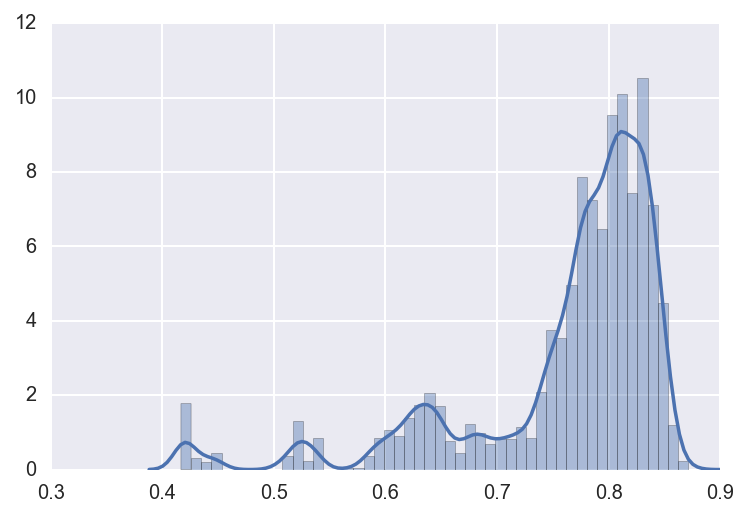

In [6]:
sns.distplot(ff)

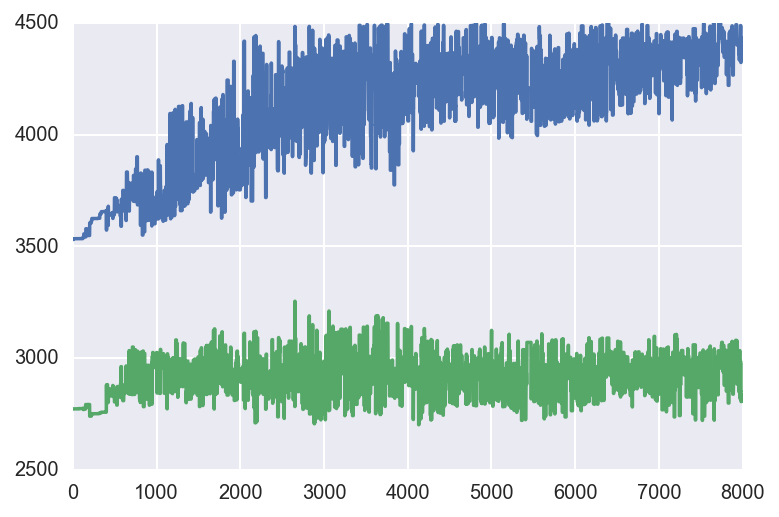

In [7]:
plt.plot(fc_sorted[:,0])
plt.plot(fc_sorted[:,6])

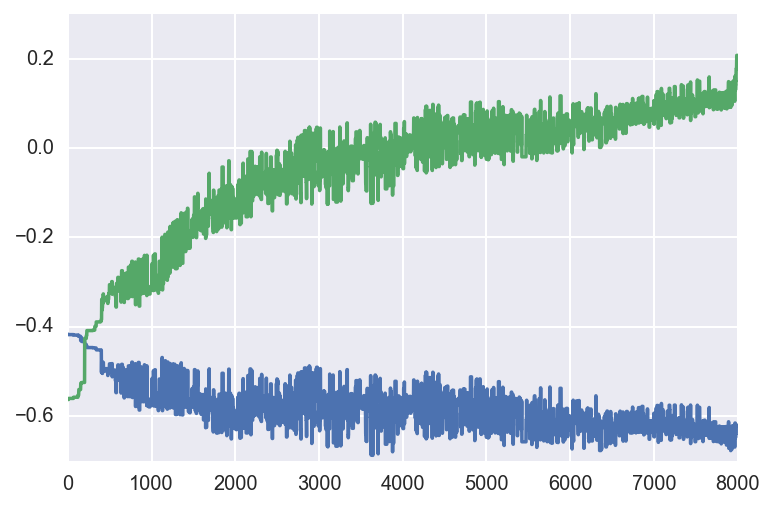

In [8]:
plt.plot(fc_sorted[:,5])
plt.plot(fc_sorted[:,7])

In [9]:
#ax = sns.kdeplot(ff_sorted, fc_sorted[:,0], shade=True)
#ax.plot(ff_sorted[400], fc_sorted[400,0], 'b*', ms=13)
#ax.plot(ff_sorted[4000], fc_sorted[4000,0], 'k*', ms=13)
#ax.plot(ff_sorted[7600], fc_sorted[7600,0], 'r*', ms=13)

### Generate the data using the new `plot_specific_mix_model.py`

This custom Starfish python script generates model spectra at 5, 50, and 95 percentiles of fill factor, and then saves them to a csv file named `models_ff-05_50_95.csv`.

In [10]:
import pandas as pd

In [11]:
models = pd.read_csv('/Users/gully/GitHub/welter/sf/m121/output/mix_emcee/run02/models_ff-05_50_95.csv')

In [12]:
models.head()

,data,wl,model_comp05,model_cool05,model_hot05,model_comp50,model_cool50,model_hot50,model_comp95,model_cool95,model_hot95
0,0.300928,14800.123686,0.305250,0.123487,0.181763,0.310588,0.126535,0.184053,0.310527,0.145828,0.164699
1,0.300130,14800.230722,0.303884,0.123104,0.180780,0.309863,0.126304,0.183560,0.310396,0.145758,0.164638
2,0.330830,14800.337742,0.303139,0.122842,0.180297,0.309594,0.126181,0.183413,0.310548,0.145758,0.164790
3,0.310501,14800.444749,0.302846,0.122624,0.180222,0.309629,0.126088,0.183541,0.310828,0.145703,0.165124
4,0.315334,14800.551740,0.302948,0.122419,0.180529,0.309910,0.125975,0.183935,0.311184,0.145531,0.165653


### This is a complex Matplotlib layout

### m101

In [16]:
models = pd.read_csv('/Users/gully/GitHub/welter/sf/m101/output/mix_emcee/run02/models_ff-05_50_95.csv')

In [15]:
sns.set_style('ticks')

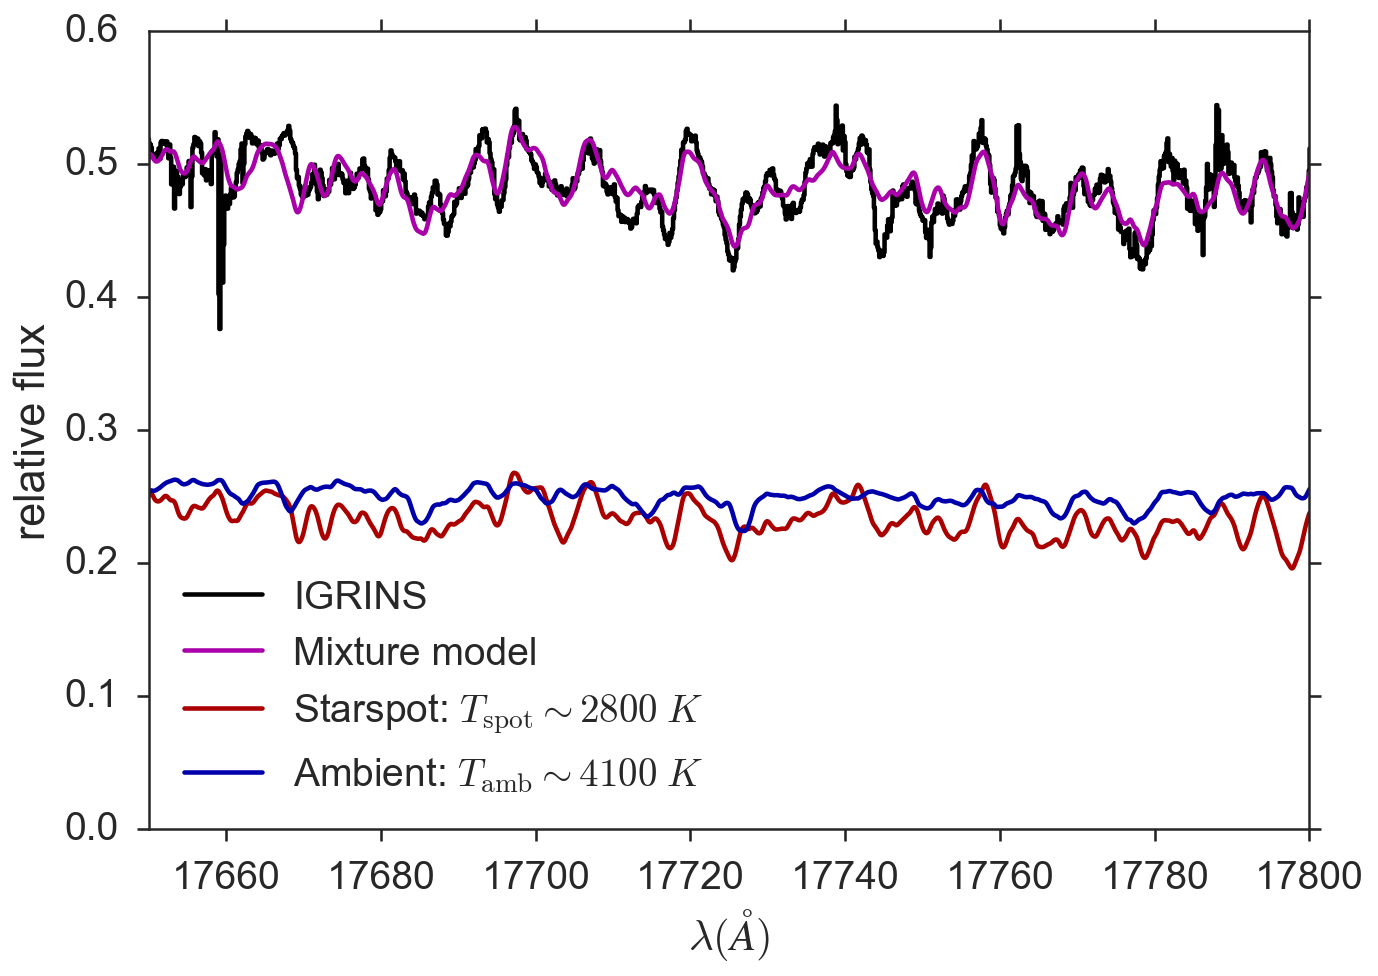

In [20]:
plt.step(models.wl, models.data, 'k', label='IGRINS')
plt.xlabel('$\lambda (\AA)$')
plt.ylabel('relative flux')

plt.plot(models.wl, models.model_comp50, color='#AA00AA', label='Mixture model')
plt.plot(models.wl, models.model_cool50, color='#AA0000', label='Starspot: $T_{\mathrm{spot}} \sim 2800 \; K$')
plt.plot(models.wl, models.model_hot50, color='#0000AA', label='Ambient: $T_{\mathrm{amb}} \sim 4100 \;K$')
plt.xlim(17650, 17800)
plt.ylim(0, 0.6)
#plt.yticks([])
#plt.xticks([])
plt.legend(loc='lower left')
#plt.title('80% coverage fraction of starspots')
plt.savefig('../results/fig/example_spec_m101.png', dpi=300)

### m116

In [22]:
models = pd.read_csv('/Users/gully/GitHub/welter/sf/m116/output/mix_emcee/run02/models_ff-05_50_95.csv')

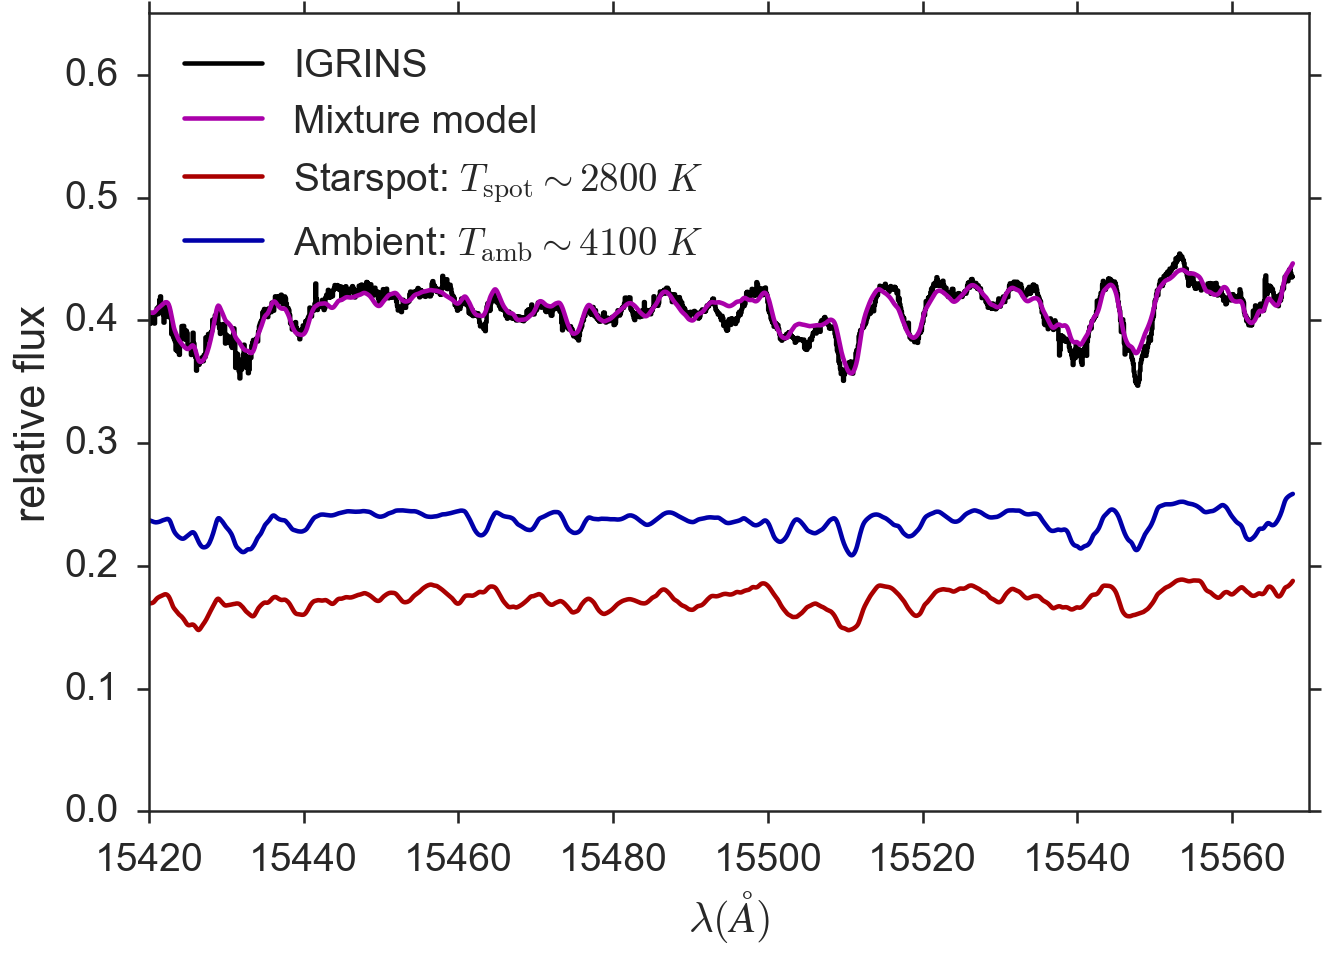

In [26]:
plt.step(models.wl, models.data, 'k', label='IGRINS')
plt.xlabel('$\lambda (\AA)$')
plt.ylabel('relative flux')

plt.plot(models.wl, models.model_comp50, color='#AA00AA', label='Mixture model')
plt.plot(models.wl, models.model_cool50, color='#AA0000', label='Starspot: $T_{\mathrm{spot}} \sim 2800 \; K$')
plt.plot(models.wl, models.model_hot50, color='#0000AA', label='Ambient: $T_{\mathrm{amb}} \sim 4100 \;K$')
plt.xlim(15420, 15570)
plt.ylim(0, 0.65)
#plt.yticks([])
#plt.xticks([])
plt.legend(loc='upper left')
#plt.title('80% coverage fraction of starspots')
plt.savefig('../results/fig/example_spec_m116.png', dpi=300)

In [13]:
sns.set_context('talk', font_scale=1.5)

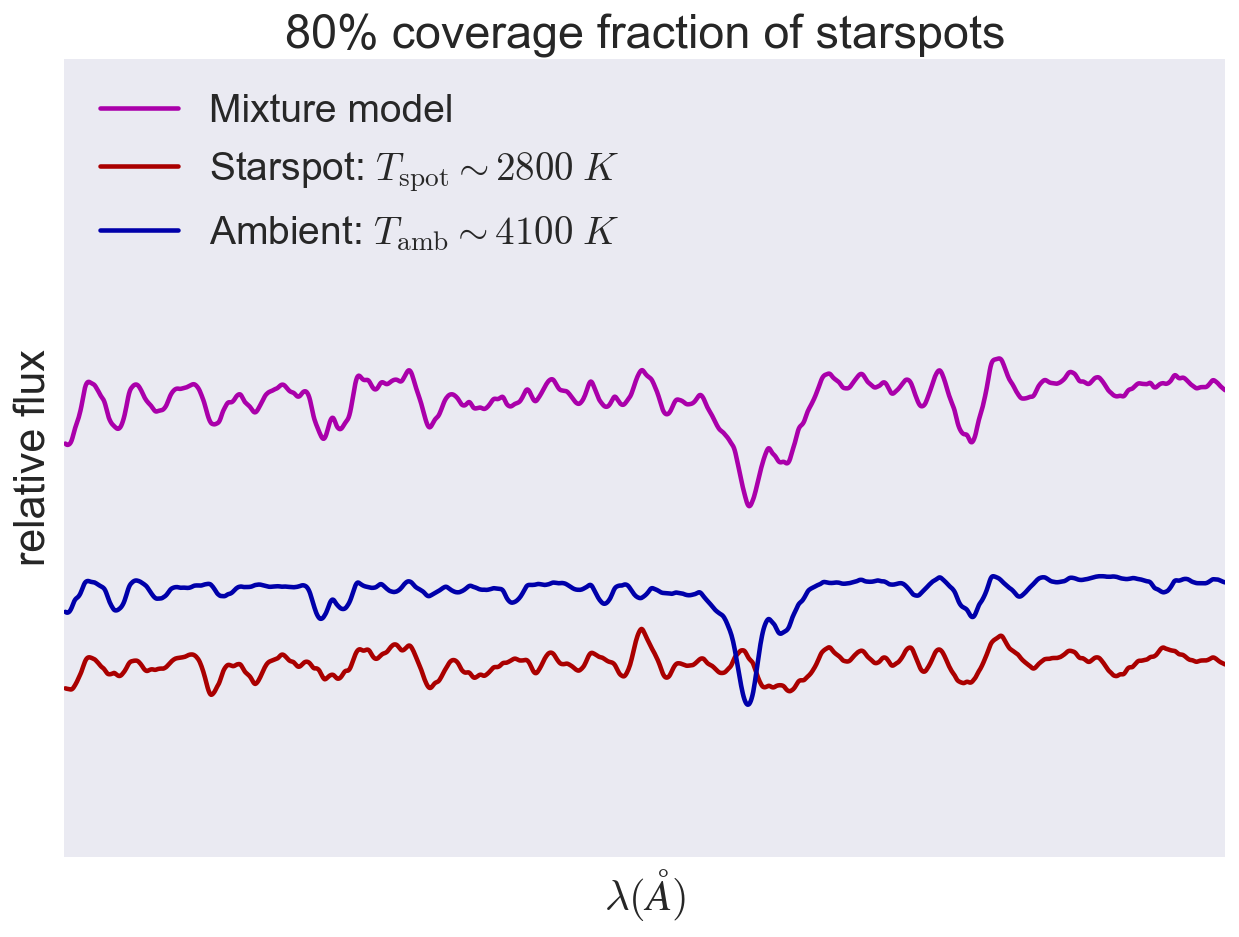

In [14]:
#plt.step(models.wl, models.data, 'k', label='IGRINS')
plt.xlabel('$\lambda (\AA)$')
plt.ylabel('relative flux')

plt.plot(models.wl, models.model_comp50, color='#AA00AA', label='Mixture model')
plt.plot(models.wl, models.model_cool50, color='#AA0000', label='Starspot: $T_{\mathrm{spot}} \sim 2800 \; K$')
plt.plot(models.wl, models.model_hot50, color='#0000AA', label='Ambient: $T_{\mathrm{amb}} \sim 4100 \;K$')
plt.xlim(14800, 14940)
plt.ylim(0, 0.6)
plt.yticks([])
plt.xticks([])
plt.legend(loc='upper left')
plt.title('80% coverage fraction of starspots')
plt.savefig('../results/fig/example_spec_m121.png', dpi=300)

In [ ]:
sns.set_context()

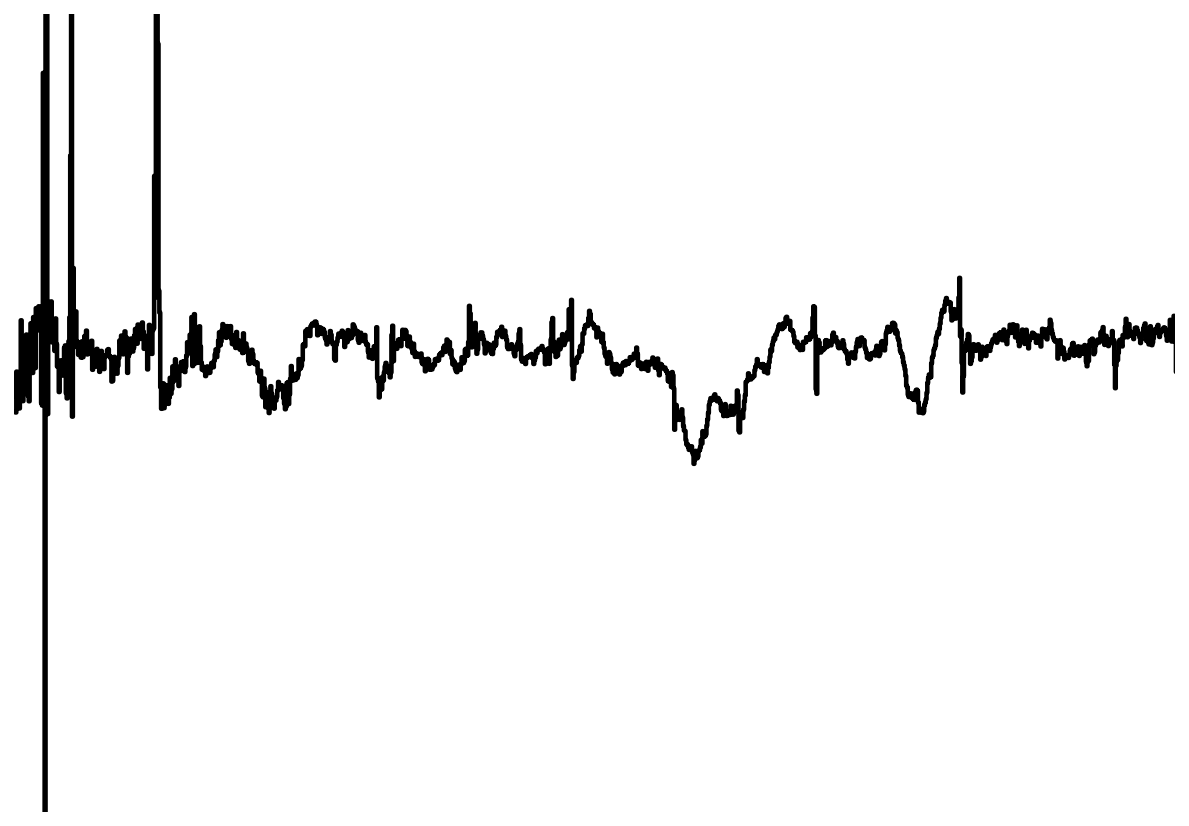

In [44]:
fig = plt.figure(frameon=False)
ax = fig.add_subplot(111, frame_on=False, alpha=0.2)
#ax.plot(models.wl, models.model_comp50, color='#AA00AA', label='Mixture model')
#plt.plot(models.wl, models.model_cool50, color='#AA0000', label='Starspot: $T_{\mathrm{spot}} \sim 2800 \; K$')
#plt.plot(models.wl, models.model_hot50, color='#0000AA', label='Ambient: $T_{\mathrm{amb}} \sim 4100 \;K$')
plt.step(models.wl, models.data, 'k', label='IGRINS')
ax.set_xlim(14800, 14940)
ax.set_ylim(0, 0.6)
ax.set_yticks([])
ax.set_xticks([])

plt.savefig('../results/fig/example_data.pdf', dpi=300, transparent=True)

## Alternate

In [42]:
models2 = pd.read_csv('/Users/gully/GitHub/welter/sf/m115/output/mix_emcee/run02/models_ff-05_50_95.csv')

In [43]:
models = models2

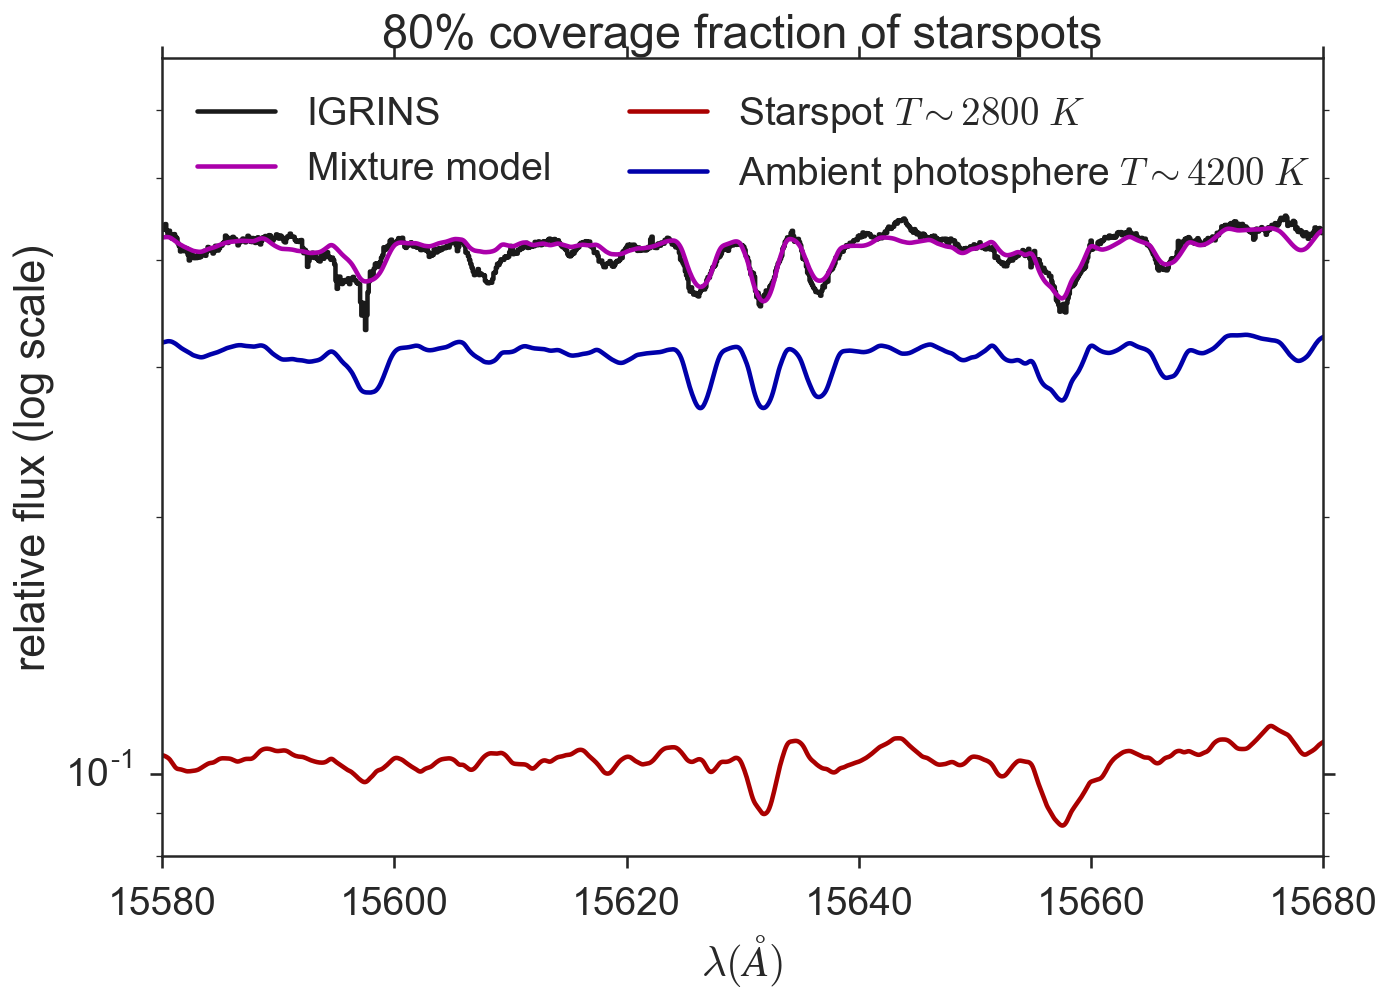

In [52]:
plt.step(models.wl, models.data, 'k', label='IGRINS')
plt.xlabel('$\lambda (\AA)$')
plt.ylabel('relative flux (log scale)')

plt.plot(models.wl, models.model_comp50, color='#AA00AA', label='Mixture model')
plt.plot(models.wl, models.model_cool50, color='#AA0000', label='Starspot $T \sim 2800 \; K$')
plt.plot(models.wl, models.model_hot50, color='#0000AA', label='Ambient photosphere $T \sim 4200 \;K$')
plt.xlim(15580, 15680)
plt.ylim(0.08, 0.69)
plt.yscale('log')
plt.legend(loc='upper left', ncol=2)
plt.title('80% coverage fraction of starspots')
plt.savefig('../results/fig/example_spec_2.png', dpi=300)

The end.